![example](images/director_shot.jpeg)

# Project Title

**Authors:** Susan Nduta Kanyora.
***

## Overview

The project is based on the entertainment industry specifically movie production.The entertainment industry is fast evolving and it is only prudent for stakeholders such as production companies to keep up with the current trends.It has been seen in recent years that consumers are moving away from going to movie theatres to streaming movies.The creation of movies streaming sites as Netflix,Amazon Prime Video just to mention a few has made it possible to analyze the behaviour of consumers.The analysis helps production companies to make decisions based on which movie genres are popular,average ratings and how many minutes an average consumer spends on the streaming platforms.

## Business Problem
The business problem being addressed is to provide insights into the success and popularity of movies, which can help production companies make informed decisions regarding the type of movies to produce and invest in.

The data questions that we plan to answer to solve this problem are:

1.What are the highest-rated movies of all time?
2.Which genres have the highest average rating?
3.What is the relationship between a movie's budget and its box office revenue?
4.Which directors have the highest average rating for their movies?
5.What is the trend in movie ratings and box office revenue over time?

These questions were selected based on their relevance to the business problem and their potential to provide valuable insights into the factors that contribute to the success of a movie. For instance, knowing the highest-rated movies and genres can help production companies understand consumer behaviour and what types of movies are likely to be successful. Understanding the relationship between a movie's budget and its box office revenue can help production companies allocate their resources effectively. Knowing which directors have the highest average rating can help production companies identify talented filmmakers to work with. Finally, understanding the trend in movie ratings and box office revenue over time can help production companies anticipate changes in audience preferences and adjust their strategies accordingly.

Overall, answering these data questions can help production companies make data-driven decisions that lead to more successful and profitable movies.


## Data Understanding

The data being used for this project comes from the zipped **IM.db** database.The data analysis questions are related to movie ratings, genres, budget, revenue, directors, and time, and the database contains information on all of these variables. The dataset includes a range of information related to movies, including movie title, start year, genres, average ratings and runtimes in minutes.

The data represent a sample of movies that have been released in recent years. The sample includes movies from various countries and in various languages, although there may be some bias towards English-language films. The variables included in the dataset are a mix of categorical and numerical variables, such as movie title (categorical), start year (numerical), and runtimes (numerical).

The target variable for this project will depend on the specific data analysis question being asked. For example, the highest-rated movies of all time question will use movie ratings as the target variable, while the relationship between a movie's genre and its average ratings question will use runtimes as the target variable.The range and distribution of values for each variable will also be important to consider when conducting the data analysis.


In [114]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [115]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [116]:
# Import standard packages
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [117]:
#To explore the data
with zipfile .ZipFile('zippedData/im.db.zip') as my_zip:
    zipfile.ZipFile.extractall(my_zip,path='ZippedData')

In [118]:
#Connecting the database
conn =sqlite3.connect('ZippedData/im.db')

In [119]:
! ls zippedData


'ls' is not recognized as an internal or external command,
operable program or batch file.


## Data Preparation
Data cleaning: Here, we identify and correct errors, inconsistencies, or inaccuracies in the data. For example, we can check for duplicate entries, correct misspellings, and remove irrelevant information such as empty fields or data that do not apply to our analysis.

Data transformation: Here, we transform the data to make it suitable for analysis. This includes converting data types, scaling variables, and creating new variables that might better represent the problem at hand. For example, we can create a new variable that indicates the genre of a movie or the director's name, which can be used in our analysis.

Data integration: In this case, we combine multiple datasets or sources of data to create a unified dataset for analysis. For example, we can integrate the IMDB database with other data sources, such as Box Office Mojo or Rotten Tomatoes, to enrich the dataset and gain additional insights.

Handling missing values or outliers: Missing values or outliers can affect the analysis results. We handle missing values by either deleting them or imputing them using various techniques such as mean or median imputation. Outliers can be handled by either removing them or transforming the data to reduce their impact. For example, we can replace extreme values with the median or use log transformation to reduce the effect of outliers on the analysis.

 Data preparation is essential to ensure the quality and accuracy of the analysis. By dropping irrelevant variables and creating new ones, we can focus on the variables that are most important for the analysis goal. Handling missing values and outliers can improve the quality of the analysis by reducing bias and increasing the reliability of the results. By integrating data from multiple sources, we can create a more comprehensive dataset that provides a more complete view of the problem at hand.


In [120]:
# Here you run your code to clean the data
pd.read_sql("""
SELECT *
FROM sqlite_schema
WHERE type = 'table'
""" , conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [121]:
movies_ratings = None
movies_ratings = pd.read_sql("""
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings
    USING(movie_id)
""" , conn)

movies_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [122]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


In [123]:
#Inspecting for missing values
movies_ratings.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [124]:
#Eliminating titles with no votes or ratings
movies_ratings.dropna(subset=['numvotes'], inplace=True)


In [125]:
#Checking if the missing values were eliminated
print('Number of null ratings:', movies_ratings['averagerating'].isna().sum())
print('Number of null vote counts:', movies_ratings['numvotes'].isna().sum())



Number of null ratings: 0
Number of null vote counts: 0


In [126]:
#Eliminating titles with no genre listed
movies_ratings.dropna(subset=['genres'], inplace=True)

In [127]:
#Checking for duplicated values
movies_ratings.duplicated().sum()

0

In [128]:
movies_ratings.duplicated(subset='original_title').sum()

2707

In [129]:
movies_ratings[movies_ratings.duplicated(subset=['original_title', 'runtime_minutes', 'start_year'])]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2658,tt10275936,Raggarjävlar (Swedish Greasers),Raggarjävlar (Swedish Greasers),2019,70.0,Documentary,6.9,47.0
11830,tt1644694,The Gift,The Gift,2010,NaN,"Animation,Drama",5.9,7.0
12984,tt1674217,Transit,Transit,2010,80.0,"Biography,Documentary,Family",6.7,13.0
19111,tt1825978,The Artist,The Artist,2011,100.0,Thriller,6.8,6.0
23887,tt1967651,Unconditional Love,Unconditional,2012,92.0,"Drama,Thriller",5.6,660.0
24139,tt1977822,Inside,Inside,2012,85.0,Horror,4.0,397.0
33380,tt2246595,Blood Money,Blood Money,2012,109.0,"Action,Drama,Thriller",5.2,881.0
37698,tt2363471,The Summit,The Summit,2012,95.0,"Adventure,Documentary",6.9,4147.0
47280,tt2805202,Rise of the Undead,Rise of the Undead,2013,70.0,Action,4.2,20.0
50941,tt3019098,The Last Act,The Last Act,2012,NaN,Thriller,5.7,6.0


In [130]:
#Sorting the dataset by vote count
movies_ratings.sort_values(by='numvotes', ascending=False, inplace=True)

In [131]:
#Eliminating the duplicates
movies_ratings.drop_duplicates(subset=['original_title', 'runtime_minutes', 'start_year'], inplace= True, keep='first')


In [132]:
movies_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0
311,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0
20342,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405.0
356,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0


In [133]:
#Creating a new dataframe
clean_genres = movies_ratings.copy()

In [134]:
#Chenging from string to a list 
clean_genres['genres'] = clean_genres['genres'].str.split(',')
clean_genres.head(6)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7066,tt1375666,Inception,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"[Action, Thriller]",8.4,1387769.0
311,tt0816692,Interstellar,Interstellar,2014,169.0,"[Adventure, Drama, Sci-Fi]",8.6,1299334.0
20342,tt1853728,Django Unchained,Django Unchained,2012,165.0,"[Drama, Western]",8.4,1211405.0
356,tt0848228,The Avengers,The Avengers,2012,143.0,"[Action, Adventure, Sci-Fi]",8.1,1183655.0
545,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"[Biography, Crime, Drama]",8.2,1035358.0


In [135]:
#Cleaning a list of all unique genres,we can iterate through them.
genres_all = set()
genres_column = clean_genres['genres']

for glist in genres_column:
    for g in glist:
        genres_all.add(g)
    
print(genres_all)    

{'Adult', 'War', 'History', 'Animation', 'Reality-TV', 'Family', 'Horror', 'Fantasy', 'Western', 'Documentary', 'Thriller', 'Music', 'Adventure', 'Musical', 'Sci-Fi', 'Biography', 'Mystery', 'Action', 'Game-Show', 'Romance', 'Drama', 'News', 'Comedy', 'Short', 'Crime', 'Sport'}


In [136]:
print(f'There are {len(genres_all)} genres in our IMDb dataset.They are:\n\n {genres_all}.')

There are 26 genres in our IMDb dataset.They are:

 {'Adult', 'War', 'History', 'Animation', 'Reality-TV', 'Family', 'Horror', 'Fantasy', 'Western', 'Documentary', 'Thriller', 'Music', 'Adventure', 'Musical', 'Sci-Fi', 'Biography', 'Mystery', 'Action', 'Game-Show', 'Romance', 'Drama', 'News', 'Comedy', 'Short', 'Crime', 'Sport'}.


In [137]:
# Using df.explode() to split each row so that it is a singular genre. 
expl_clean_genres = clean_genres.explode('genres')
expl_clean_genres.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7066,tt1375666,Inception,Inception,2010,148.0,Action,8.8,1841066.0
7066,tt1375666,Inception,Inception,2010,148.0,Adventure,8.8,1841066.0
7066,tt1375666,Inception,Inception,2010,148.0,Sci-Fi,8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Action,8.4,1387769.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Thriller,8.4,1387769.0


In [138]:
expl_clean_genres['genres'].value_counts()

Drama          30784
Documentary    17748
Comedy         17289
Thriller        8212
Horror          7672
Action          6986
Romance         6586
Crime           4610
Adventure       3817
Biography       3807
Family          3411
Mystery         3038
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1967
Animation       1742
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genres, dtype: int64

In [139]:
#Putting together 'movie_id' for each entry in four genres.
titles_in_genres = (expl_clean_genres[expl_clean_genres['genres'].isin(['Game-Show', 'Short', 'Adult', 'Reality-TV'])]['movie_id'])

In [140]:
#Using df.drop() to eliminate the entries of the genres listed above.
clean_genres.drop(index=clean_genres[clean_genres['movie_id'].isin(titles_in_genres)].index)

for dataset in [clean_genres, expl_clean_genres, movies_ratings]:
    dataset.drop(
        index=dataset[
            dataset['movie_id'].isin(titles_in_genres)
        ].index,
    inplace=True)

In [141]:
expl_clean_genres['genres'].value_counts()

Drama          30779
Documentary    17738
Comedy         17285
Thriller        8211
Horror          7671
Action          6984
Romance         6586
Crime           4610
Adventure       3815
Biography       3806
Family          3411
Mystery         3038
History         2824
Sci-Fi          2206
Fantasy         2126
Music           1966
Animation       1742
Sport           1179
War              853
Musical          721
News             578
Western          280
Name: genres, dtype: int64

In [142]:
#Exploring the distributions of averagerating and numvotes.
mean_votes = movies_ratings['numvotes'].mean()
mean_votes

3564.0968895098

In [143]:
median_votes = movies_ratings['numvotes'].median()
median_votes

51.0

In [144]:
q90_votes = movies_ratings['numvotes'].quantile(0.90)
q90_votes

1621.0

In [145]:
#Inspecting the bottom 90% of movies with regards to number of votes
movies_ratings.query(f"numvotes < {q90_votes}").sample(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
5524,tt1080019,Jerry Cotton,Jerry Cotton,2010,90.0,"Action,Comedy,Crime",5.3,840.0
87046,tt5052972,Yaara Silly Silly,Yaara Silly Silly,2015,108.0,Romance,5.7,207.0
87961,tt5106182,Brown Willy,Brown Willy,2016,76.0,"Comedy,Drama",6.8,19.0
102200,tt5977668,O Último Poema,O Último Poema,2015,NaN,Documentary,8.1,11.0
21111,tt1870467,Magyar Retró,Magyar Retró,2010,82.0,Documentary,8.5,73.0
113917,tt6722208,The Writer with No Hands: Final Cut,The Writer with No Hands: Final Cut,2017,71.0,Documentary,7.8,15.0
11588,tt1636459,El rati horror show,El rati horror show,2010,98.0,Documentary,7.8,389.0
37549,tt2360318,Load,Yük,2012,80.0,Drama,6.7,156.0
60207,tt3487526,Pig Girl,Pig Girl,2014,NaN,Horror,6.0,27.0
140796,tt9149530,This is Måneskin,This is Måneskin,2018,65.0,Documentary,6.4,5.0


In [146]:
#Dropping these movie titles from the dataset
for dataset in [
    clean_genres,
    expl_clean_genres,
    movies_ratings
]:
    dataset.drop(
        index=dataset.query(f"numvotes < {q90_votes}").index,
        inplace=True
    )

In [148]:
print(movies_ratings.shape)


(7304, 8)


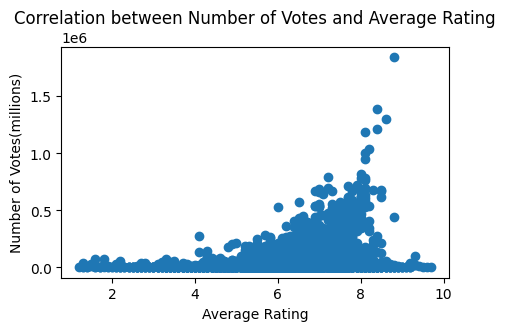

In [151]:
#Investigating the correlation between number of votes and average rating using a scatterplot.
# Create scatter plot
fig, ax = plt.subplots(figsize=(5,3))

ax.scatter(
    x=movies_ratings['averagerating'],
    y=movies_ratings['numvotes'],
)


ax.set_xlabel('Average Rating')
ax.set_ylabel('Number of Votes(millions)')
plt.title('Correlation between Number of Votes and Average Rating')

# Show the plot
plt.show()
 

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***